In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
import pickle

from scipy.stats import bootstrap
from scipy.spatial import distance_matrix

In [11]:
vectors = np.array([np.arange(1,5), np.arange(4,8)])

inds = np.eye(2, dtype=np.int32)
out = vectors[inds]

In [14]:
out.shape

(2, 2, 4)

In [46]:
d = 50

vectors = []
for t in range(1, 100):
    k = np.arange(1, int(d/2) + 1)
    w = 1/10000**(2*k/d)

    a = np.sin(w*t)
    b = np.cos(w*t)

    p = np.empty((a.size + b.size,), dtype=a.dtype)
    p[0::2] = a
    p[1::2] = b

    vectors.append(p)
    
vectors = np.array(vectors)

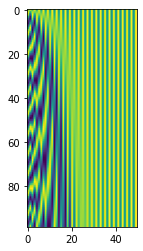

In [47]:
plt.imshow(vectors)

# Visualizing PFI

In [4]:
# Load data
dataset_path = os.path.join('cichy_data', 'subj0', 'MEG2_subj01_sess01_tsss_mc-3.fif')
raw = mne.io.read_raw_fif(dataset_path, preload=True)

Opening raw data file cichy_data/subj0/MEG2_subj01_sess01_tsss_mc-3.fif...
    Range : 4930000 ... 5162999 =   4930.000 ...  5162.999 secs
Ready.
Reading 0 ... 232999  =      0.000 ...   232.999 secs...


/var/folders/nv/wjmf18wd5_j38vg9v0cthl5h0000gn/T/ipykernel_5053/2079735790.py:3: RuntimeWarning: This filename (cichy_data/subj0/MEG2_subj01_sess01_tsss_mc-3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(dataset_path, preload=True)


In [5]:
raw = raw.pick('grad')

In [6]:
grads = []
for i in range(102):
    grads.append(raw.info['chs'][i*2]['loc'][:3])

grads = np.array(grads)    
dist_matrix = distance_matrix(grads, grads)

In [7]:
closest_k = []
k = 4
for i in range(102):
    idx = np.argpartition(dist_matrix[i], k)
    closest_k.append(idx[:k])

In [8]:
with open('cichy_data/subj0/grad_closest' + str(k), 'wb') as f:
    pickle.dump(closest_k, f)

In [96]:
channels = []
with open('../results/cichy_epoched/wavenetclasslinear/val_loss_PFIch1.txt') as f:
    for i, line in enumerate(f):
        if i==0:
            val = float(line.strip())
        else:
            channels.append(float(line.strip()))

In [106]:
channels = []
with open('../results/cichy_epoched/indiv_lda_chn/all_loss.txt') as f:
    for i, line in enumerate(f):
        channels.append(float(line.strip()))
channels = np.array(channels)
channels = np.mean(channels.reshape(102, 3), axis=1)

In [97]:
channels = val - np.array(channels)

In [36]:
channels = [v for i, v in enumerate(channels)]

In [37]:
channels = np.array([1] * 102)
channels[list(closest_k[100])] = 0

In [20]:
# use channels from model inversion
file = open(os.path.join('..', 'results', 'cichy_epoched', 'indiv_lda_pca_nonorm', 'patterns.npy'), 'rb')
patterns = np.load(file)#[:, 0, 1]

In [21]:
patterns = np.abs(patterns)
patterns = np.mean(patterns, axis=1)
patterns = np.mean(patterns.reshape(-1, 306)[14:15, :], axis=0)
channels = np.mean(patterns.reshape(102, 3), axis=1)

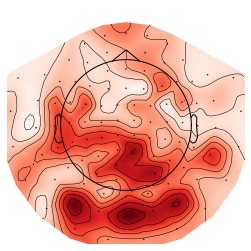

(<matplotlib.image.AxesImage at 0x7fe598813af0>,
 <matplotlib.contour.QuadContourSet at 0x7fe598813e50>)

In [22]:
chn_type = 'mag'
raw = raw.pick(chn_type)
mne.viz.plot_topomap(channels, raw.info, ch_type=chn_type)

In [23]:
sid = np.array([1, 2, 4, 5, 2, 3, 5, 4, 1, 2])
sbj = np.array([0, 1, 2, 3])
np.in1d(sid, sbj)

array([ True,  True, False, False,  True,  True, False, False,  True,
        True])